<a href="https://colab.research.google.com/github/vaishnavipatil29/Sign-Language-Recognition/blob/main/Static%20Gesture%20Detection/Alphabets_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

print(os.listdir("../input"))

Using TensorFlow backend.


['asl']


In [ ]:
path = "../input/asl/asl"

In [ ]:
dirs = os.listdir(path)

In [ ]:
label_dict = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
    '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16,
    'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24,
    'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32,
    'x': 33, 'y': 34, 'z': 35,
}

In [ ]:
size = 200,200

def load_dataset(path):
    image_data = list()
    labels = list()
    dirs = os.listdir(path)
    print("Loading images for: ", end =" ")
    for Dir in dirs:
        print("{} |".format(Dir), end=" ")
        path_img = path+'/'+Dir
        images = os.listdir(path_img)
        for image in images:
            temp_img = cv2.imread(path_img+'/'+image)
            temp_img = cv2.resize(temp_img, size)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            image_data.append(temp_img)
            labels.append(label_dict[Dir])
    
    image_data = np.array(image_data)
    labels = to_categorical(labels)
    
    image_data, labels = shuffle(image_data, labels, random_state=1)

    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.05)
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_dataset(path)

Loading images for:  i | w | y | n | 3 | v | m | 1 | 5 | p | 0 | s | h | o | t | e | c | r | q | a | z | 7 | 9 | 2 | l | k | d | j | 8 | f | b | 4 | g | x | u | 6 | 

#### Plotting of gesture data

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("shape of y_train/labels: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("shape of y_test/labels: ", y_test.shape)

Shape of X_train:  (24026, 200, 200, 3)
shape of y_train/labels:  (24026, 36)
Shape of X_test:  (1265, 200, 200, 3)
shape of y_test/labels:  (1265, 36)


In [ ]:
samples = np.random.choice(len(X_train), 8)

In [ ]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title, fontsize=50)
        a.grid(False)
        a.axis("off")
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()
    

In [ ]:
sample_images = []
sample_labels = []
for sample in samples:
    sample_images.append(X_train[sample])
    for key, val in label_dict.items():
        if np.argmax(y_train[sample]) == val:
            sample_labels.append(key)

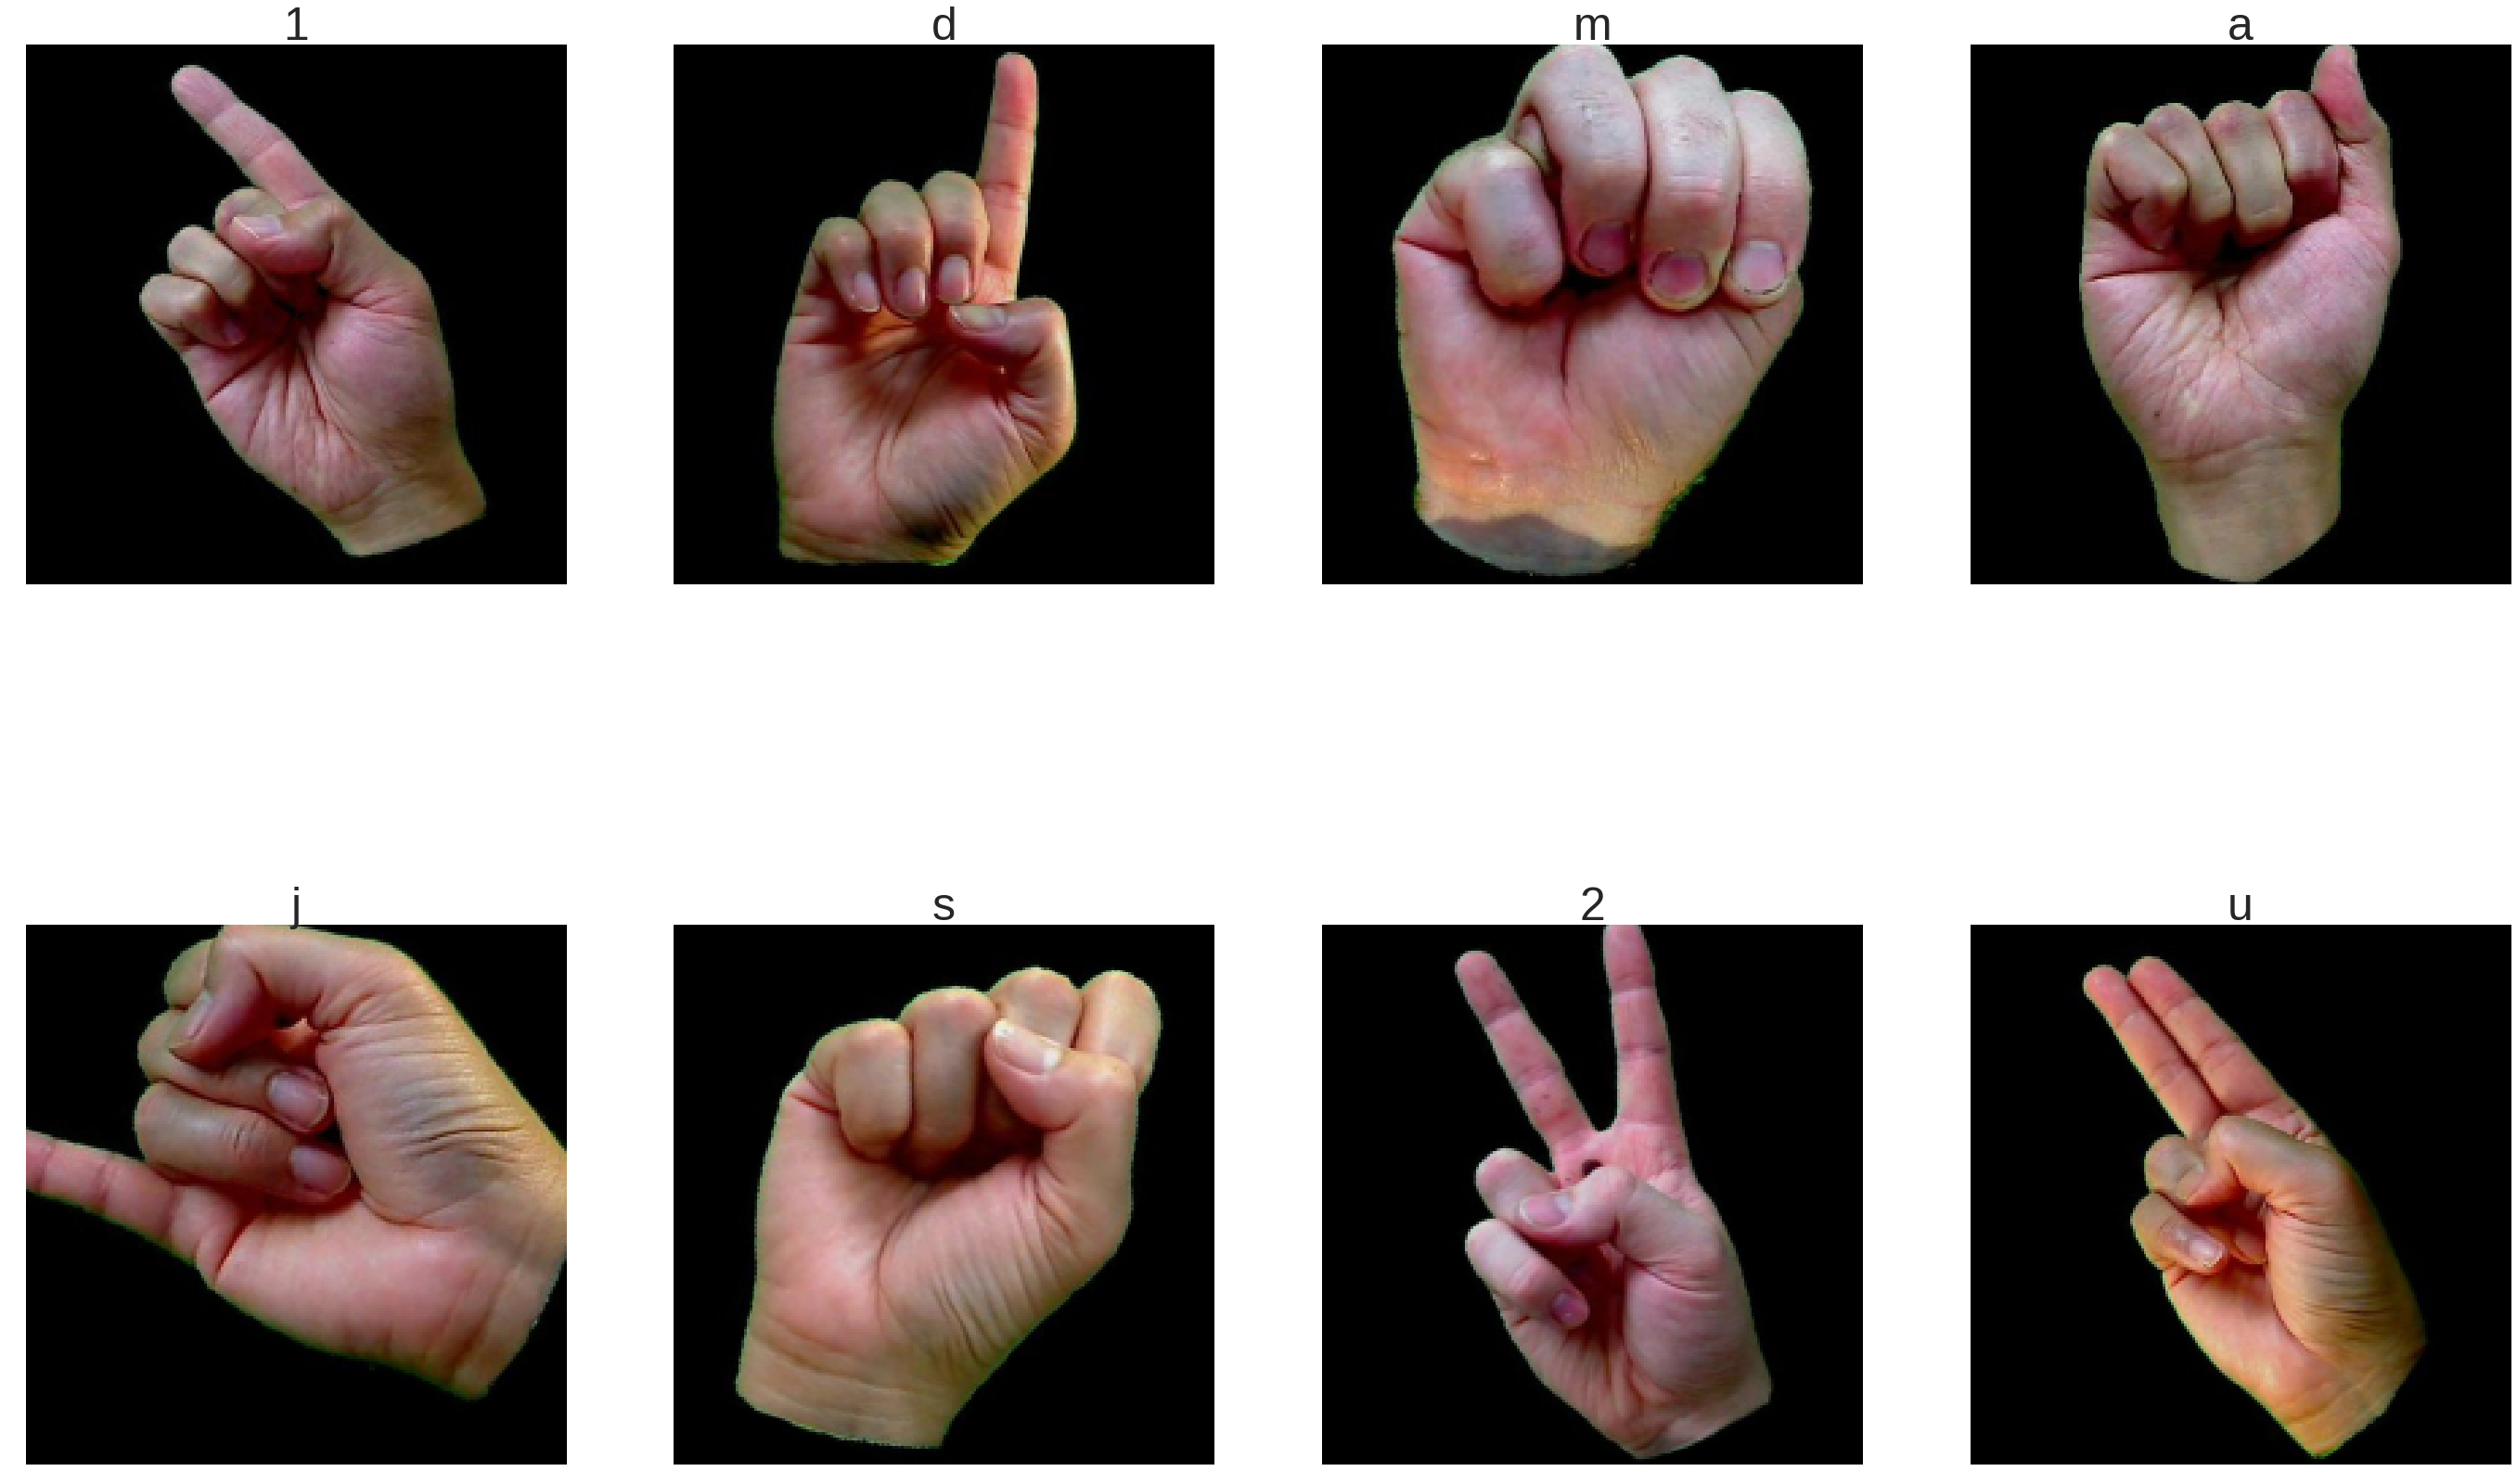

In [ ]:
show_images(sample_images, 2, titles=sample_labels)

### Model

In [ ]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (200,200,3)))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(512, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(36, activation = 'softmax'))
    
    print("MODEL CREATED")
    return model

In [ ]:
model = create_model()

MODEL CREATED


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 66, 66, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 66, 66, 128)       409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 256)       295168    
__________

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [ ]:
model_hist = model.fit(X_train, y_train, batch_size = 32, epochs = 15, validation_data=(X_test, y_test))

Train on 24026 samples, validate on 1265 samples
Epoch 1/15
24026/24026 [==============================] - 82s 3ms/step - loss: 2.2515 - acc: 0.5349 - val_loss: 1.7484 - val_acc: 0.6040
Epoch 2/15
24026/24026 [==============================] - 78s 3ms/step - loss: 0.8423 - acc: 0.8178 - val_loss: 1.2988 - val_acc: 0.6332
Epoch 3/15
24026/24026 [==============================] - 78s 3ms/step - loss: 0.5374 - acc: 0.8765 - val_loss: 1.4796 - val_acc: 0.6458
Epoch 4/15
24026/24026 [==============================] - 78s 3ms/step - loss: 0.4121 - acc: 0.9031 - val_loss: 0.4825 - val_acc: 0.8680
Epoch 5/15
24026/24026 [==============================] - 78s 3ms/step - loss: 0.3374 - acc: 0.9220 - val_loss: 0.3092 - val_acc: 0.9455
Epoch 6/15
24026/24026 [==============================] - 78s 3ms/step - loss: 0.2759 - acc: 0.9374 - val_loss: 0.2570 - val_acc: 0.9470
Epoch 7/15
24026/24026 [==============================] - 78s 3ms/step - loss: 0.2431 - acc: 0.9468 - val_loss: 0.1661 - val_acc:

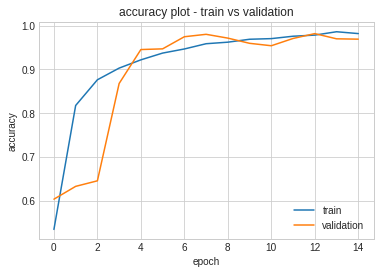

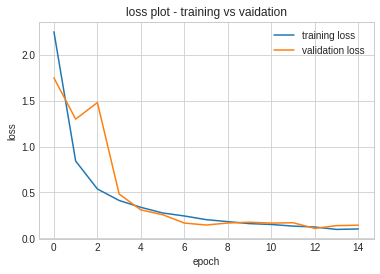

In [ ]:
def plot_accuracy(y):
    if(y == True):
        plt.plot(model_hist.history['acc'])
        plt.plot(model_hist.history['val_acc'])
        plt.legend(['train', 'validation'], loc='lower right')
        plt.title('accuracy plot - train vs validation')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.show()
    else:
        pass
    return

def plot_loss(y):
    if(y == True):
        plt.plot(model_hist.history['loss'])
        plt.plot(model_hist.history['val_loss'])
        plt.legend(['training loss', 'validation loss'], loc = 'upper right')
        plt.title('loss plot - training vs vaidation')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        pass
    return


plot_accuracy(True)
plot_loss(True)

In [ ]:
model.save("asl_bestsofar.h5")

In [ ]:
samples_test = np.random.choice(len(X_test), 8)
samples_test

array([ 627,   46,  691, 1041, 1070,  546,  218, 1104])

In [ ]:
sample_images = []
sample_labels = []
pred_labels = []
for sample in samples_test:
    sample_images.append(X_test[sample])
    img = X_test[sample].reshape((1,200,200,3))
    pred = model.predict_classes(img)
    
    for key, val in label_dict.items():
        if pred[0] == int(val):
            pred_labels.append(key)
            
    for key, val in label_dict.items():
        if np.argmax(y_test[sample]) == val:
            sample_labels.append(key)

In [ ]:
def show_test_images(images, cols = 1, true_label = None, pred_label=None):
    n_images = len(images)
    fig = plt.figure()
    for n, (image, label, pred) in enumerate(zip(images, true_label, pred_label)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title("{}\n{}".format(label, pred), fontsize=50)
        a.grid(False)
        a.axis("off")
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()
    

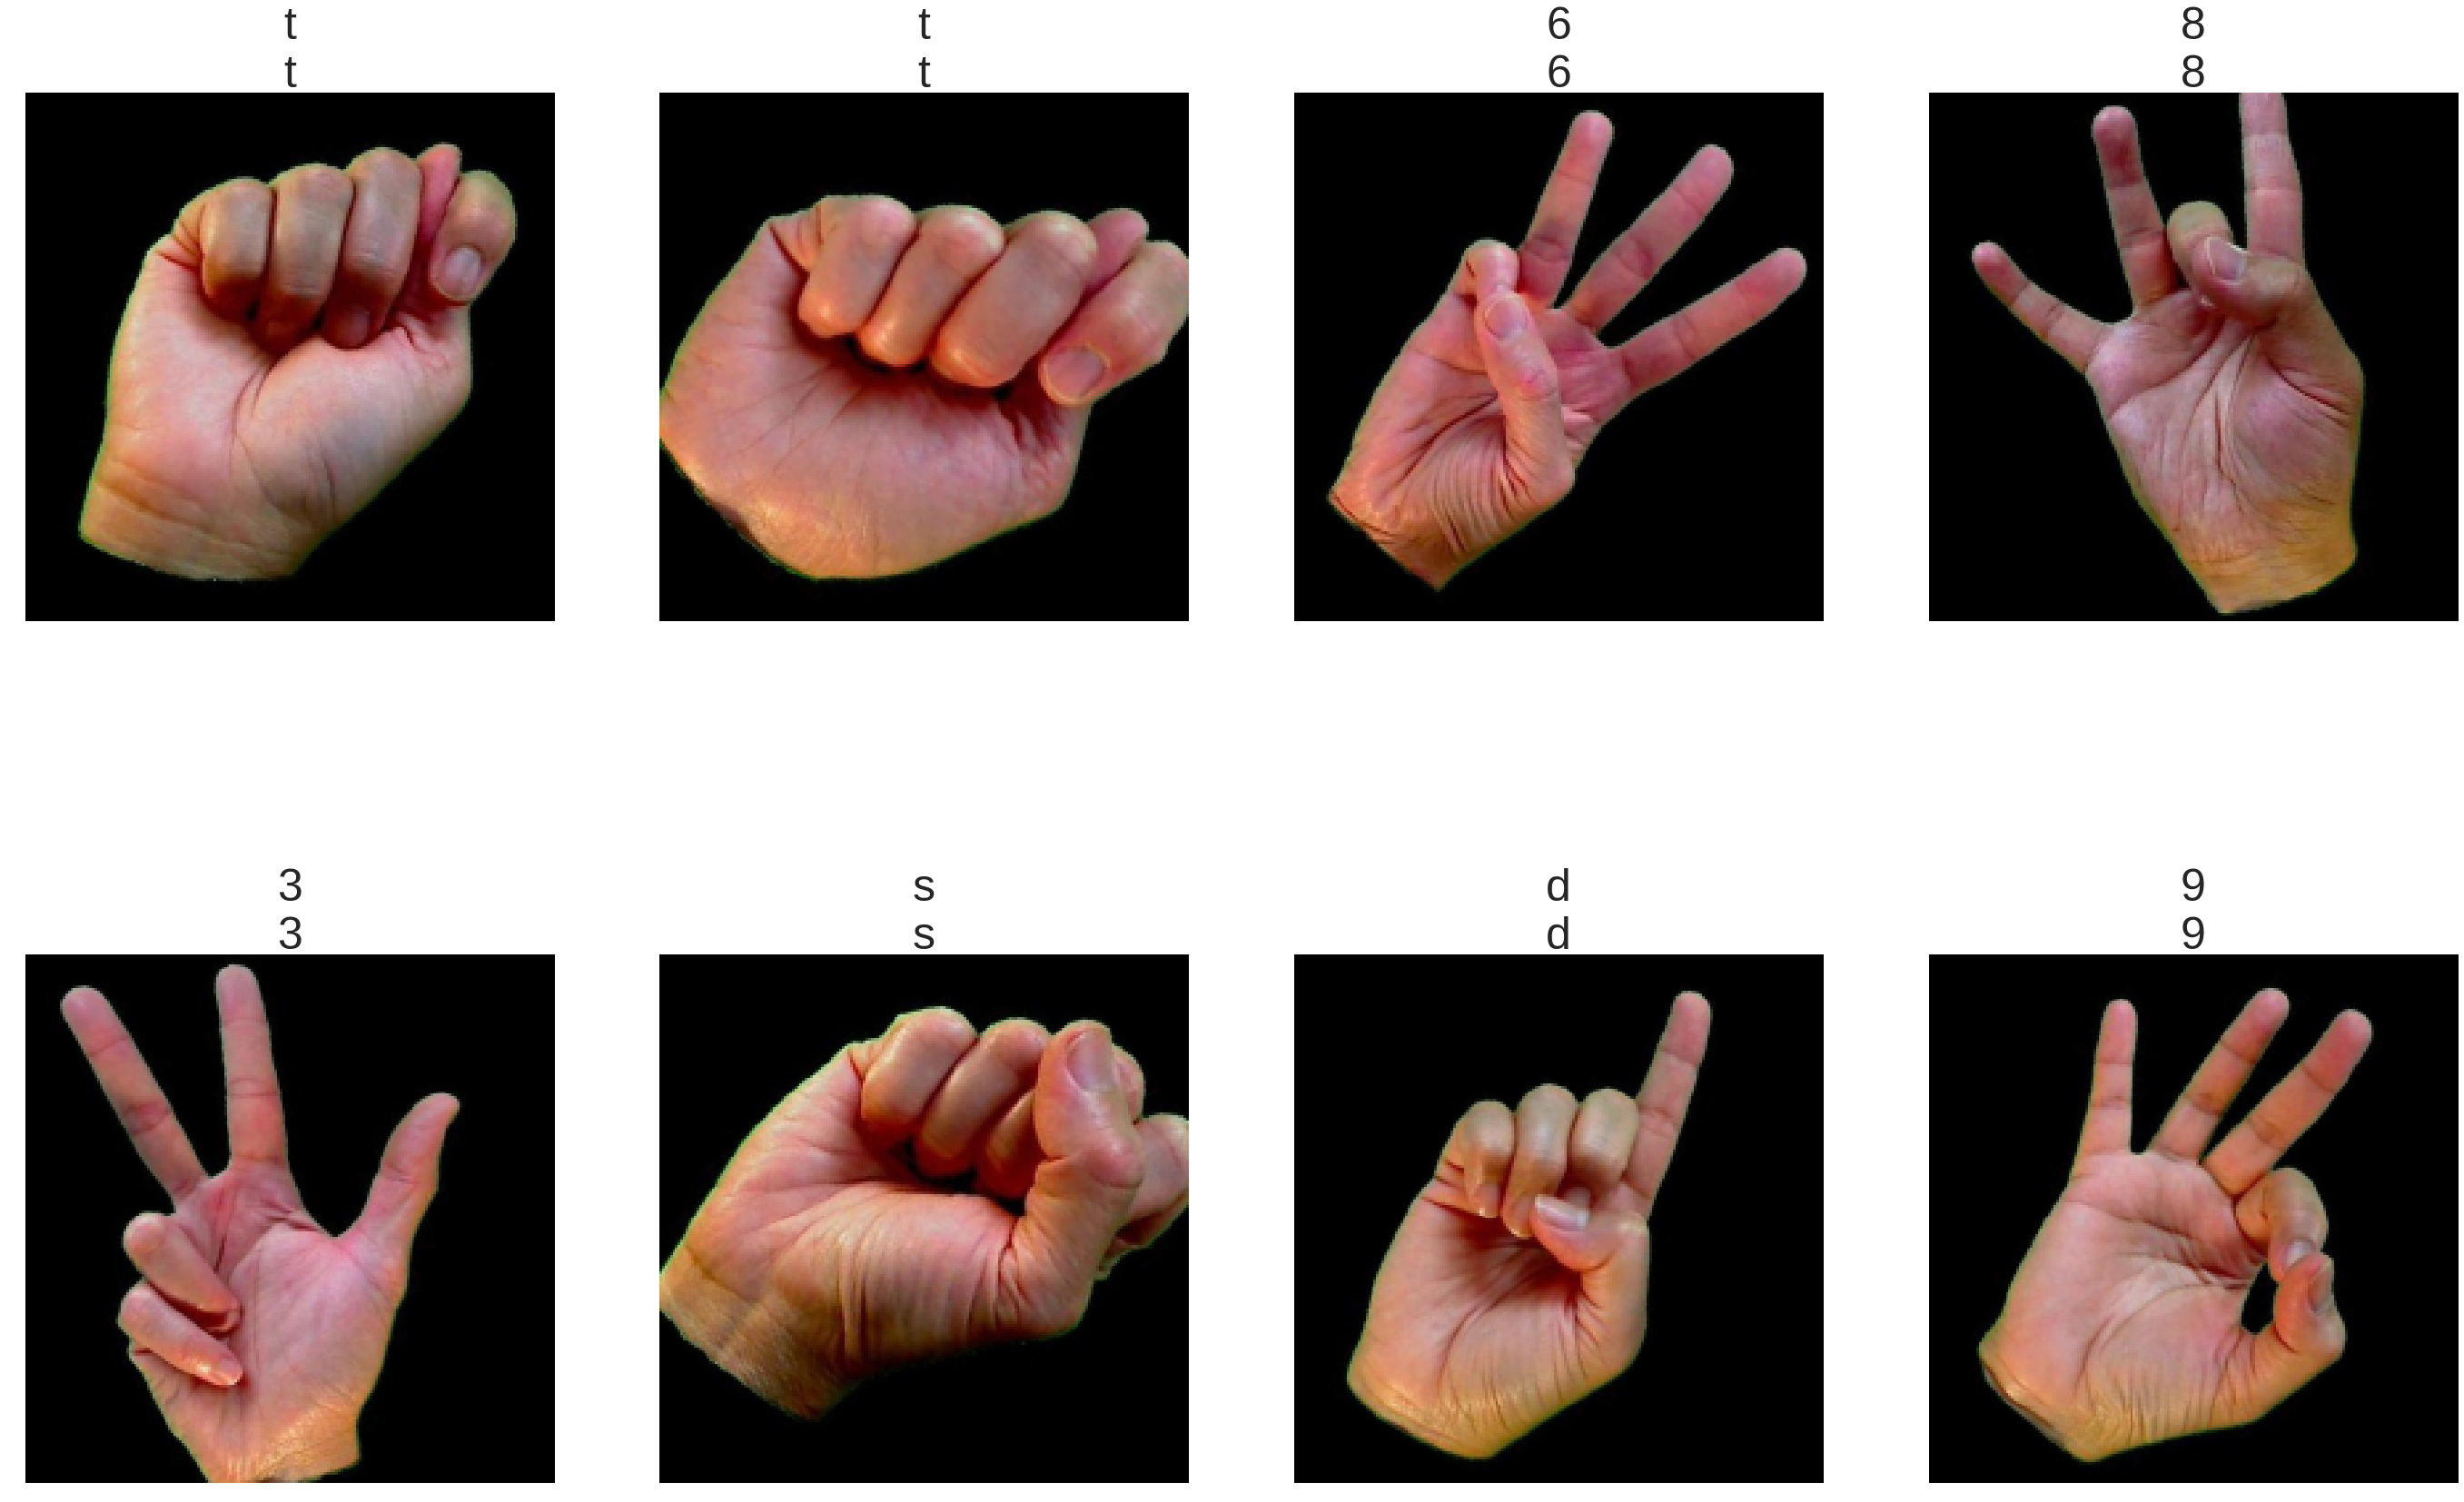

In [ ]:
show_test_images(sample_images, 2, sample_labels, pred_labels)